# DATAMINING of TITANIC dataset

In [10]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import graphlab
from graphlab import SFrame
import seaborn  as sns

In [3]:
#se non hai seaborn installato
#! pip install --user seaborn


### Acquisizione dei dati

In [15]:
train_df = pd.read_csv('Classification/data/train.csv')
test_df = pd.read_csv('Classification/data/test.csv')
combine = [train_df, test_df]


In [7]:
len(train_df)+ len(test_df) #numero di osservazioni

1309

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#include le stringhe
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [13]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Visualizzazione dei dati

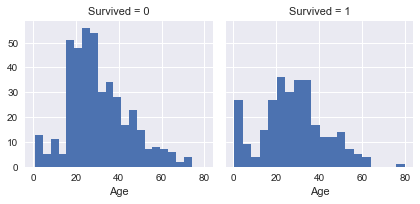

In [17]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

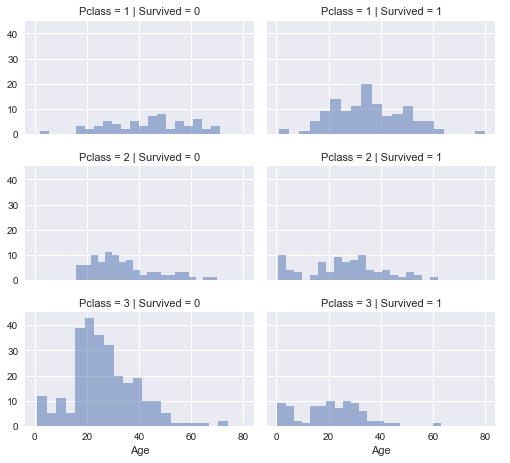

In [18]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

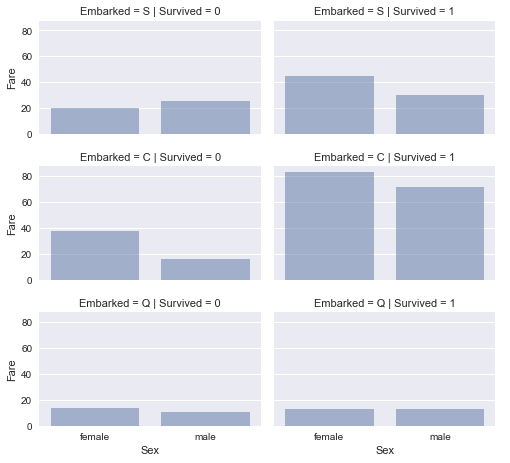

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [20]:
train_df['Has_Cabin'] = train_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test_df['Has_Cabin'] = test_df["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [21]:
train_df[["Has_Cabin", "Survived"]].groupby(['Has_Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


In [22]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [23]:
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

In [24]:
train_df[["IsAlone", "Survived"]].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,1,1


### Sostituiamo con il piu' frequente

In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [27]:
train_df['Embarked'] = train_df['Embarked'].fillna(freq_port)
test_df['Embarked'] = test_df['Embarked'].fillna(freq_port)

### Contiamo i missing values per Age

In [29]:
age_null_count = train_df['Age'].isnull().sum()
age_null_count


177

### C'e' una correlazione tra Age, Gender, and Pclass

In [30]:
len(train_df)

891

In [33]:
# elimino i valori nulli

train_df = train_df[train_df['Age'].notnull()]
test_df = test_df[test_df['Age'].notnull()]


In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,1.0,0,0,373450,8.0500,NaN,S,0,1,1


In [37]:
df_embarked =pd.get_dummies(train_df["Embarked"])
df_Pclass =pd.get_dummies(train_df["Pclass"])

In [38]:
test_df_embarked =pd.get_dummies(test_df["Embarked"])
test_df_Pclass =pd.get_dummies(test_df["Pclass"])

In [39]:
df_embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [40]:
test_df =pd.concat([test_df, test_df_embarked], axis=1)
test_df =pd.concat([test_df, test_df_Pclass], axis=1)

In [41]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,FamilySize,IsAlone,C,Q,S,1,2,3
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0,1,1,0,1,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0,2,0,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0,1,1,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0,1,1,0,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,0,3,0,0,0,1,0,0,1


In [42]:
train_df =pd.concat([train_df, df_Pclass], axis=1)
train_df =pd.concat([train_df, df_embarked], axis=1)



In [43]:
train_df['Ticket'] = train_df['Ticket'].astype('|S') 
train_df['Name'] = train_df['Name'].astype('|S') 
train_df['Cabin'] = train_df['Cabin'].astype('|S') 
train_df['Embarked'] = train_df['Embarked'].astype('|S') 

test_df['Ticket'] = test_df['Ticket'].astype('|S') 
test_df['Name'] = test_df['Name'].astype('|S') 
test_df['Cabin'] = test_df['Cabin'].astype('|S') 
test_df['Embarked'] = test_df['Embarked'].astype('|S') 




In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 21 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null int64
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null object
Has_Cabin      714 non-null int64
FamilySize     714 non-null int64
IsAlone        714 non-null int64
1              714 non-null uint8
2              714 non-null uint8
3              714 non-null uint8
C              714 non-null uint8
Q              714 non-null uint8
S              714 non-null uint8
dtypes: float64(2), int64(9), object(4), uint8(6)
memory usage: 93.4+ KB


## Trasformo e salvo i dataframe train_df e test_df in SFrame

In [47]:
train_sf = SFrame(data=train_df)
test_sf = SFrame(data=test_df)

In [48]:
train_sf.save("Classification/data/train_sf.csv")
test_sf.save("Classification/data/test_sf.csv")

In [49]:
test_sf.head()

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,nan,Q
893,3,"Wilkes, Mrs. James (EllenNeeds) ...",1,47.0,1,0,363272,7.0,nan,S
894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,nan,Q
895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,nan,S
896,3,"Hirvonen, Mrs. Alexander(Helga E Lindqvist) ...",1,22.0,1,1,3101298,12.2875,nan,S
897,3,"Svensson, Mr. JohanCervin ...",0,14.0,0,0,7538,9.225,nan,S
898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,nan,Q
899,2,"Caldwell, Mr. AlbertFrancis ...",0,26.0,1,1,248738,29.0,nan,S
900,3,"Abrahim, Mrs. Joseph(Sophie Halaut Easu) ...",1,18.0,0,0,2657,7.2292,nan,C
901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.15,nan,S
